# EDA_Exploratory_Data_Analysis

In [45]:
import pandas as pd

In [46]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For linear regression with numerical variables
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [47]:
df_all = pd.read_csv("../data/clean/data_clean.csv")
df_all.head()

id         name              club best_position  best_overall  pace  \
0   2  G. Pasquale           Udinese           LWB            71    71   
1  16  Luis García         KAS Eupen            CM            70    53   
2  27      J. Cole     Coventry City           CAM            71    45   
3  41      Iniesta       Vissel Kobe           CAM            82    58   
4  61   D. Odonkor  Alemannia Aachen            RW            66    91   

   shooting  passing  dribbling2  defense  physicality   hits  age  \
0        59       70          71       68           69    4.0   33   
1        69       73          69       58           63    4.0   37   
2        68       76          77       36           52   11.0   33   
3        70       85          85       63           59  149.0   36   
4        56       56          67       27           63    7.0   27   

  nationality     wage  potential      value  total_stats  attacking  skill  \
0       Italy   7000.0         69   625000.0         1929        313    338   
1       Spain   7000.0         71   600000.0         1906        337    369   
2     England  15000.0         71  1100000.0         1770        337    387   
3       Spain  12000.0         81  5500000.0         2014        367    408   
4     Germany   5000.0         70   725000.0         1649        271    276   

   movement  power  mentality  defending  goalkeeping  
0       347    347        320        208           56  
1       305    324        362        153           56  
2       295    284        317         99           51  
3       346    297        370        181           45  
4       406    315        256         79           46

#Checking outliers in wage and value

<Axes: >

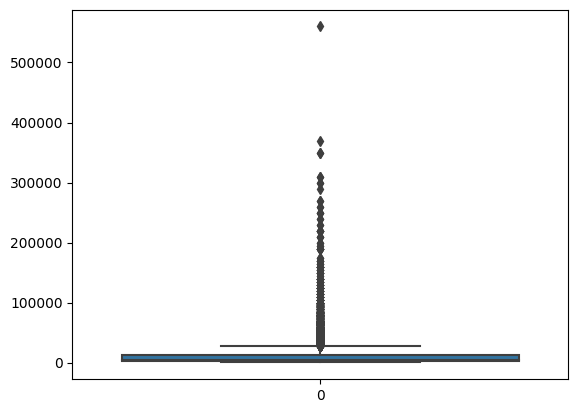

In [48]:
sns.boxplot(df_all.wage)


In [49]:
num = df_all.select_dtypes(np.number)
num.head()

id  best_overall  pace  shooting  passing  dribbling2  defense  \
0   2            71    71        59       70          71       68   
1  16            70    53        69       73          69       58   
2  27            71    45        68       76          77       36   
3  41            82    58        70       85          85       63   
4  61            66    91        56       56          67       27   

   physicality   hits  age     wage  potential      value  total_stats  \
0           69    4.0   33   7000.0         69   625000.0         1929   
1           63    4.0   37   7000.0         71   600000.0         1906   
2           52   11.0   33  15000.0         71  1100000.0         1770   
3           59  149.0   36  12000.0         81  5500000.0         2014   
4           63    7.0   27   5000.0         70   725000.0         1649   

   attacking  skill  movement  power  mentality  defending  goalkeeping  
0        313    338       347    347        320        208           56  
1        337    369       305    324        362        153           56  
2        337    387       295    284        317         99           51  
3        367    408       346    297        370        181           45  
4        271    276       406    315        256         79           46

In [50]:
num.shape

(15930, 21)

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


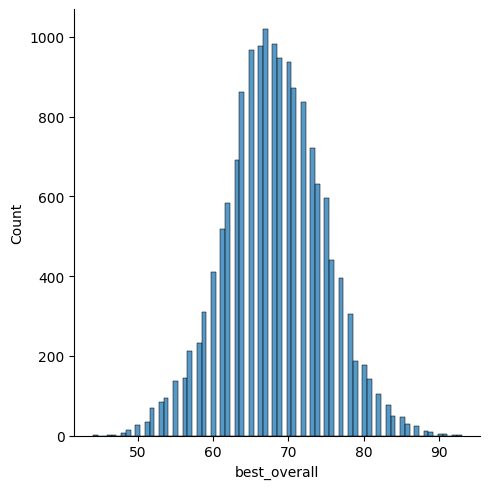

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


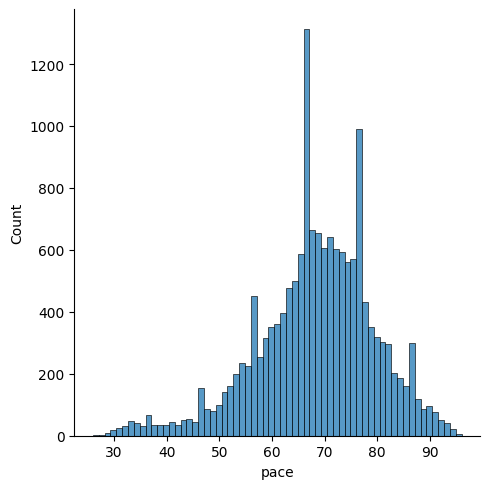

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


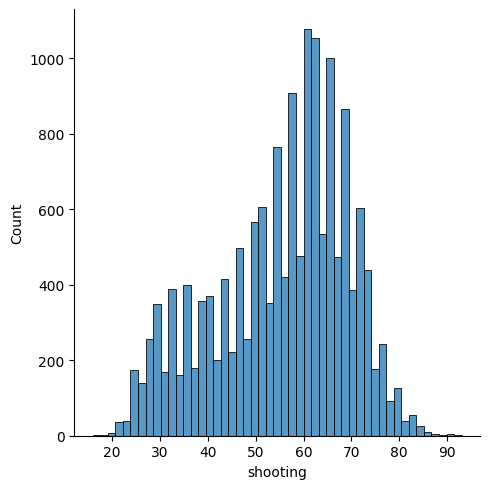

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


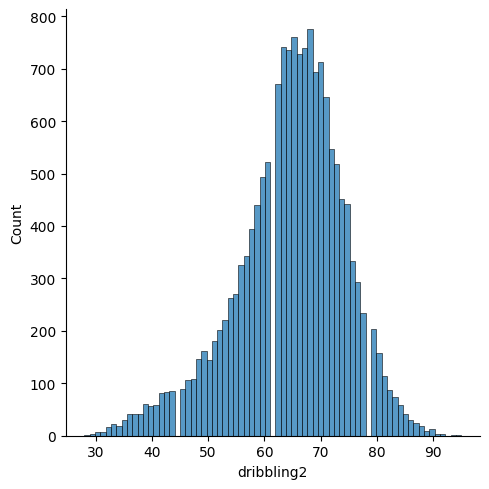

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


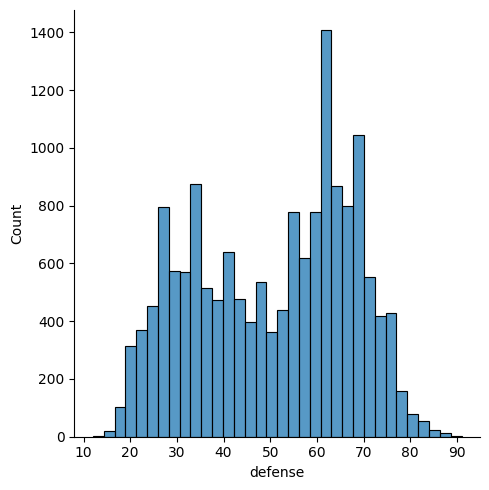

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


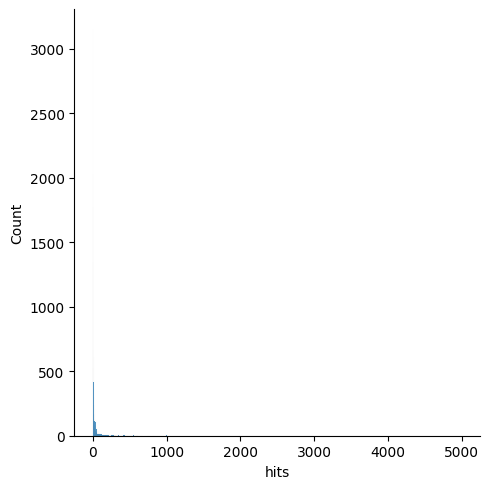

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


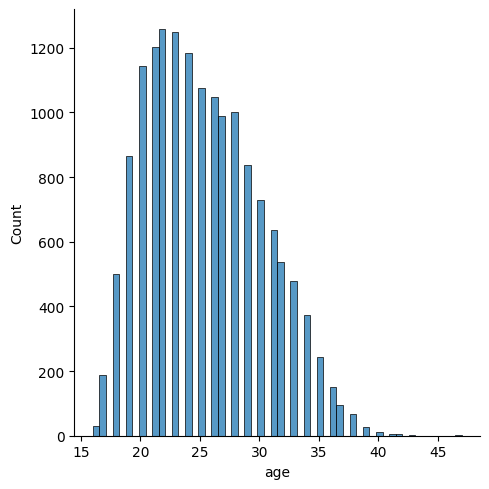

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


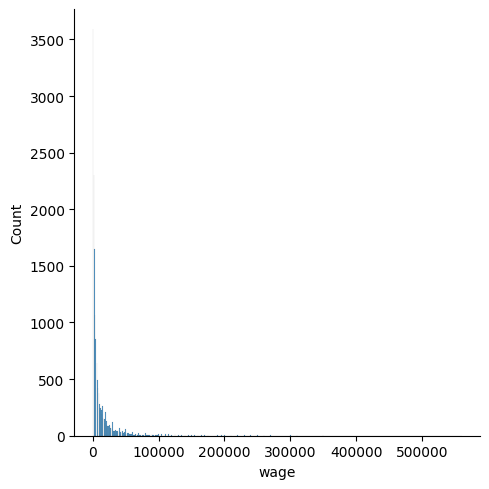

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


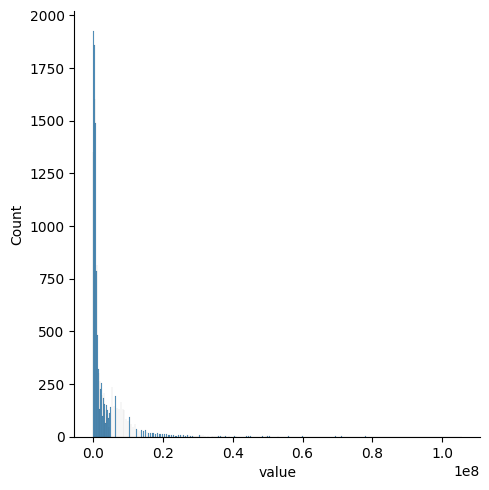

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


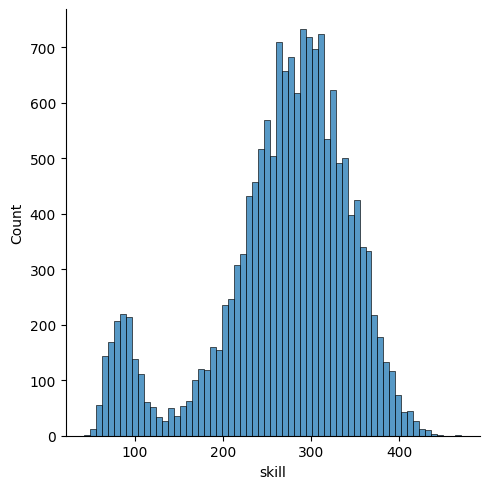

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


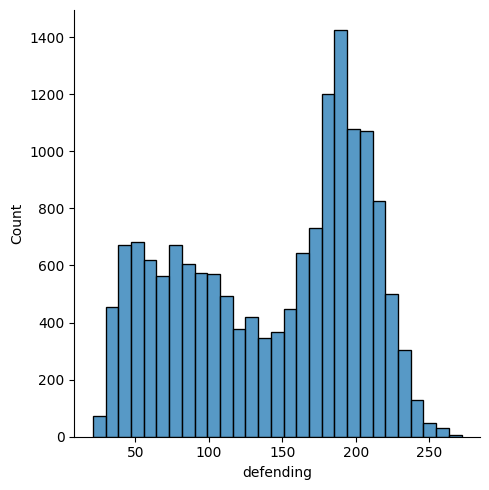

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in num.columns:
    sns.displot(num[column])
    plt.show()


In [52]:
corr = round(num.corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.heatmap(corr,cmap = 'Spectral', mask = mask, annot = True)
plt.show()

Observations :
Since I got the information that the sum of main categories is equal to the total_stats colum, it is not surprising that the variables are highly correlated. What's surprising is how goalkeeping has a negative moderate correlation with total_stats. I will only keep the total_stats column to avoid multicollinearity.

dribbling2 is highly correlated with the passing shooting columns. It also has no correlation with physicality. Since it has the same correlation coefficient with the target value as the passing column, I will drop this column.

And of course, I will not keep the unique identifier id column for the machine learning model.

In [53]:
num_new = num[['best_overall', 'pace', 'shooting', 'passing','defense', 'physicality', 'hits', 'age', 'wage', 'potential', 'total_stats','value']]

/Users/lenovo1/mid_bootcamp_project/mid_project_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


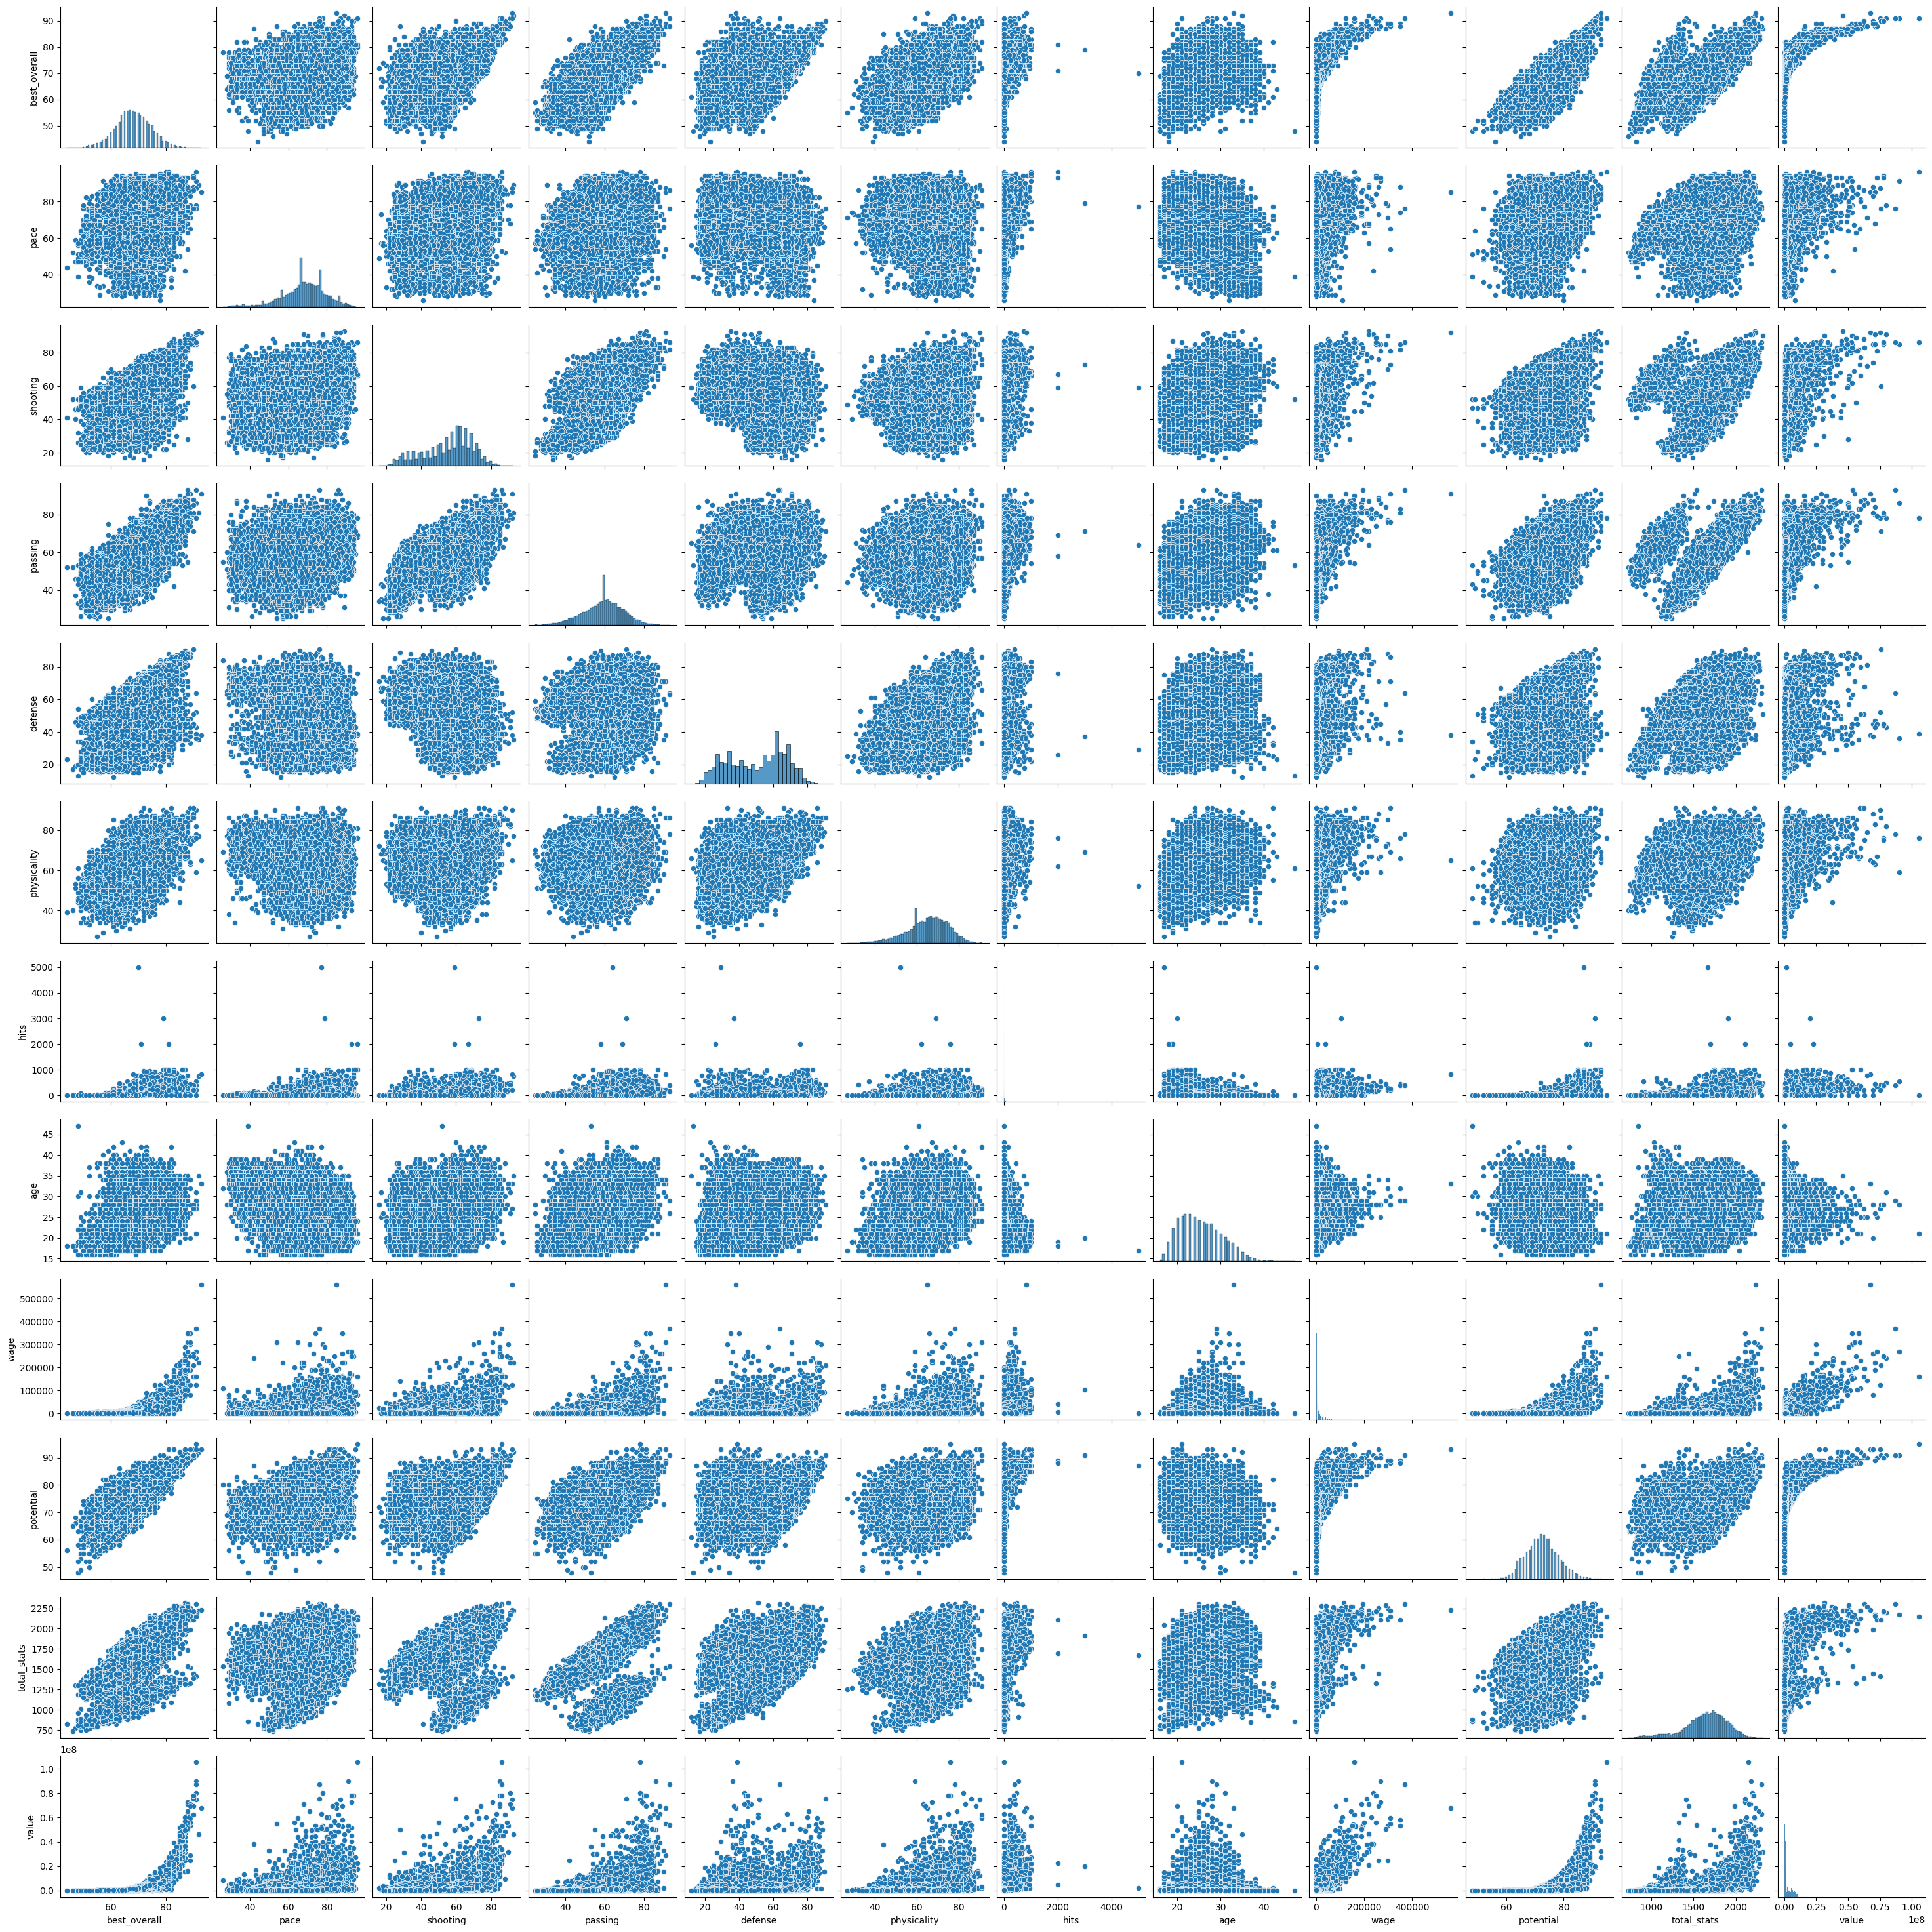

In [54]:
sns.pairplot(num_new)

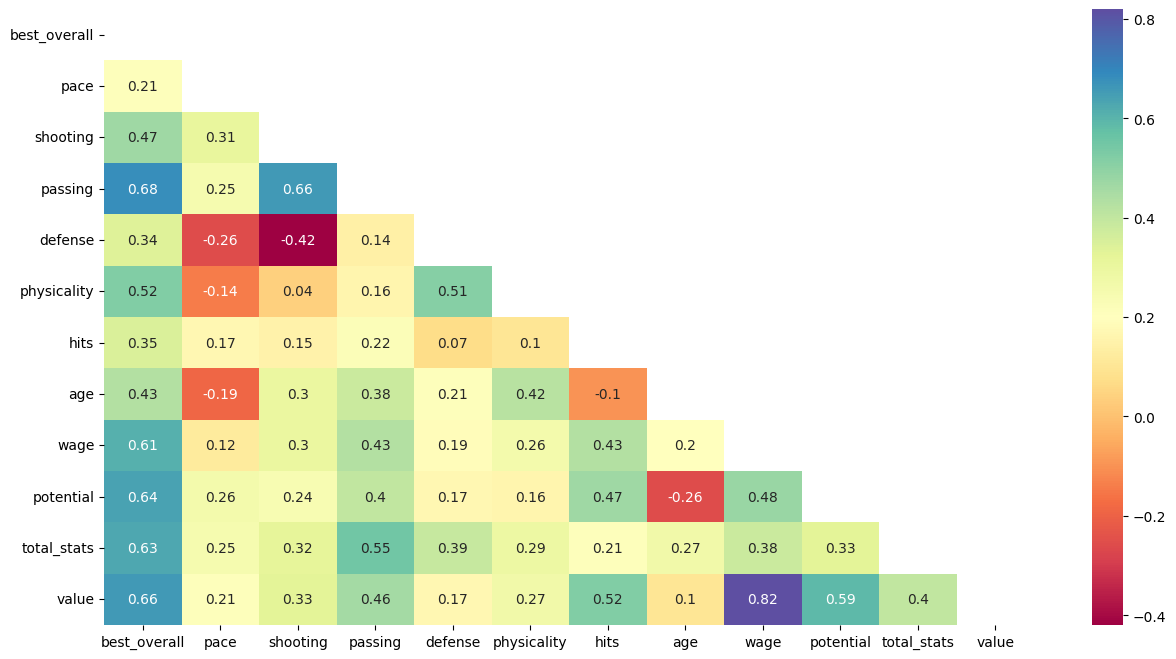

In [55]:
# new heatmap with chosen variables
corr2 = round(num_new.corr(),2)
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.heatmap(corr2,cmap = 'Spectral', mask = mask, annot = True)
plt.show()

In [56]:
num_new.describe()

best_overall          pace      shooting       passing       defense  \
count  15930.000000  15930.000000  15930.000000  15930.000000  15930.000000   
mean      68.185122     68.195041     55.273258     59.247834     50.551789   
std        6.501327     11.236244     13.807915     10.061146     16.804706   
min       44.000000     26.000000     16.000000     25.000000     12.000000   
25%       64.000000     62.000000     46.000000     53.000000     35.000000   
50%       68.000000     69.000000     58.000000     60.000000     54.000000   
75%       72.000000     76.000000     66.000000     66.000000     65.000000   
max       93.000000     96.000000     93.000000     93.000000     91.000000   

        physicality          hits           age           wage     potential  \
count  15930.000000  15930.000000  15930.000000   15930.000000  15930.000000   
mean      65.230634     31.257320     25.384871   11207.947269     72.541306   
std        9.537114     96.239471      4.799877   21747.847196      5.729409   
min       27.000000      1.100000     16.000000     250.000000     48.000000   
25%       59.000000      4.000000     22.000000    2000.000000     69.000000   
50%       66.000000      7.000000     25.000000    4000.000000     72.000000   
75%       72.000000     19.000000     29.000000   12000.000000     76.000000   
max       91.000000   5000.000000     47.000000  560000.000000     95.000000   

        total_stats         value  
count  15930.000000  1.593000e+04  
mean    1640.709981  2.740512e+06  
std      258.492083  5.530664e+06  
min      731.000000  1.000000e+03  
25%     1505.000000  4.250000e+05  
50%     1670.000000  8.750000e+05  
75%     1818.000000  2.700000e+06  
max     2316.000000  1.055000e+08

X-y Split before transforming the variables

In [57]:
X = num_new.drop(columns ='value')
y = num_new[['value']]

In [58]:
X.head()

best_overall  pace  shooting  passing  defense  physicality   hits  age  \
0            71    71        59       70       68           69    4.0   33   
1            70    53        69       73       58           63    4.0   37   
2            71    45        68       76       36           52   11.0   33   
3            82    58        70       85       63           59  149.0   36   
4            66    91        56       56       27           63    7.0   27   

      wage  potential  total_stats  
0   7000.0         69         1929  
1   7000.0         71         1906  
2  15000.0         71         1770  
3  12000.0         81         2014  
4   5000.0         70         1649

In [59]:
y.head()

value
0   625000.0
1   600000.0
2  1100000.0
3  5500000.0
4   725000.0

Copy the numerical variables into X1 and X2 for feature transformation

In [60]:
X_1 = X.copy()
X_2 = X.copy()

In [61]:
X_1.shape

(15930, 11)

In [62]:
X_2.shape

(15930, 11)

Normalizing Data

In [63]:
ntransformer = MinMaxScaler().fit(X_1)
x_normalized = ntransformer.transform(X_1)
x_normalized = pd.DataFrame(x_normalized)

In [64]:
x_normalized.shape

(15930, 11)

Standerdizing Data

In [65]:
stransformer = StandardScaler().fit(X_2)
x_standarized = stransformer.transform(X_2)
x_standarized = pd.DataFrame(x_standarized)

In [66]:
x_standarized.shape

(15930, 11)

Categorical Variables

In [67]:
categorical = df_all.select_dtypes(object)
categorical.head()

name              club best_position nationality
0  G. Pasquale           Udinese           LWB       Italy
1  Luis García         KAS Eupen            CM       Spain
2      J. Cole     Coventry City           CAM     England
3      Iniesta       Vissel Kobe           CAM       Spain
4   D. Odonkor  Alemannia Aachen            RW     Germany

In [68]:
categorical.best_position.nunique()

15

In [69]:
cat_norm = categorical.drop(['name', 'club','nationality'], axis=1)
cat_norm.head( )

best_position
0           LWB
1            CM
2           CAM
3           CAM
4            RW

In [70]:
cat_stand = categorical.drop(['name', 'nationality'], axis=1)
cat_stand.head( )

club best_position
0           Udinese           LWB
1         KAS Eupen            CM
2     Coventry City           CAM
3       Vissel Kobe           CAM
4  Alemannia Aachen            RW

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_stand:
    print("Frequency analysis of column:", col)
    my_data = cat_stand[col].value_counts().reset_index(drop=True)
    ax = sns.barplot(x=my_data.index, y=my_data, data=my_data)
    ax.set_title(col.upper())
    plt.figure()
    print()


Frequency analysis of column: club

Frequency analysis of column: best_position



<Figure size 640x480 with 0 Axes>

Making dummy variables of categorical columns

In [72]:
cat_dummies_norm = pd.get_dummies(cat_norm).reset_index(drop=True)
cat_dummies_norm .head()

best_position_CAM  best_position_CB  best_position_CDM  best_position_CF  \
0              False             False              False             False   
1              False             False              False             False   
2               True             False              False             False   
3               True             False              False             False   
4              False             False              False             False   

   best_position_CM  best_position_GK  best_position_LB  best_position_LM  \
0             False             False             False             False   
1              True             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   best_position_LW  best_position_LWB  best_position_RB  best_position_RM  \
0             False               True             False             False   
1             False              False             False             False   
2             False              False             False             False   
3             False              False             False             False   
4             False              False             False             False   

   best_position_RW  best_position_RWB  best_position_ST  
0             False              False             False  
1             False              False             False  
2             False              False             False  
3             False              False             False  
4              True              False             False

In [73]:
cat_dummies_stand = pd.get_dummies(cat_stand).reset_index(drop=True)
cat_dummies_stand.head()

club_1. FC Heidenheim 1846  club_1. FC Kaiserslautern  club_1. FC Köln  \
0                       False                      False            False   
1                       False                      False            False   
2                       False                      False            False   
3                       False                      False            False   
4                       False                      False            False   

   club_1. FC Magdeburg  club_1. FC Nürnberg  club_1. FC Saarbrücken  \
0                 False                False                   False   
1                 False                False                   False   
2                 False                False                   False   
3                 False                False                   False   
4                 False                False                   False   

   club_1. FC Union Berlin  club_1. FSV Mainz 05  club_AC Ajaccio  \
0                    False                 False            False   
1                    False                 False            False   
2                    False                 False            False   
3                    False                 False            False   
4                    False                 False            False   

   club_AC Arles Avignon  club_AC Horsens  club_AC Mineros de Guayana  \
0                  False            False                       False   
1                  False            False                       False   
2                  False            False                       False   
3                  False            False                       False   
4                  False            False                       False   

   club_AC Monza  club_AD Alcorcón  club_ADO Den Haag  club_AEK Athens  \
0          False             False              False            False   
1          False             False              False            False   
2          False             False              False            False   
3          False             False              False            False   
4          False             False              False            False   

   club_AFC Wimbledon  club_AIK  club_AJ Auxerre  club_AS Béziers  \
0               False     False            False            False   
1               False     False            False            False   
2               False     False            False            False   
3               False     False            False            False   
4               False     False            False            False   

   club_AS Monaco  club_AS Nancy Lorraine  club_AS Saint-Étienne  \
0           False                   False                  False   
1           False                   False                  False   
2           False                   False                  False   
3           False                   False                  False   
4           False                   False                  False   

   club_AZ Alkmaar  club_Aalborg BK  club_Aalesunds FK  club_Aarhus GF  \
0            False            False              False           False   
1            False            False              False           False   
2            False            False              False           False   
3            False            False              False           False   
4            False            False              False           False   

   club_Aberdeen  club_Abha Club  club_Academica Clinceni  \
0          False           False                    False   
1          False           False                    False   
2          False           False                    False   
3          False           False                    False   
4          False           False                    False   

   club_Accrington Stanley  club_Adanaspor  club_Adelaide United  club_Ajax  \
0                    False           False                 False      False   
1             

In [74]:
df_all.to_csv("../data/clean/data_clean.csv", index=False)